In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('mainSimulationAccessTraces.csv')
data

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [3]:
data = pd.read_csv('dataset.csv')
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,7,21,30,2,3,29,2,3,57,5,1,0
1,7,32,70,2,4,67,2,4,132,5,1,0
2,7,15,1,2,2,0,2,2,0,5,1,0
3,7,33,77,2,7,72,2,7,142,5,1,0
4,7,55,78,3,7,73,3,7,144,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
355886,7,25,46,2,15,45,4,15,90,7,0,8505
355887,7,82,14,7,10,8,0,10,16,0,0,22
355888,7,82,14,7,10,8,0,10,17,1,0,1
355889,7,30,62,2,20,60,3,20,120,3,0,0


In [4]:
y = data.iloc[:,0].values
x = data.iloc[:,1:].values
x,y

(array([[  21,   30,    2, ...,    5,    1,    0],
        [  32,   70,    2, ...,    5,    1,    0],
        [  15,    1,    2, ...,    5,    1,    0],
        ...,
        [  82,   14,    7, ...,    1,    0,    1],
        [  30,   62,    2, ...,    3,    0,    0],
        [  30,   62,    2, ...,    7,    0, 9156]], dtype=int64),
 array([7, 7, 7, ..., 7, 7, 7], dtype=int64))

In [5]:
y.shape

(355891,)

In [6]:
model = KMeans(n_clusters = 8)
model.fit(x)

KMeans()

In [7]:
model.labels_

array([0, 0, 0, ..., 0, 0, 5])

In [8]:
c = 0
d = {
    0:7,1:6,2:5,3:4,4:3,5:2,6:1,7:0
}
for i in range(len(model.labels_)):
    z = d[model.labels_[i]]
    if(z == y[i]):
        c+=1
c

228252

In [9]:
c= 0
for i in range(len(model.labels_)):
   
    if(model.labels_[i] == y[i]):
        c+=1
c

19233

In [10]:
c/355891

0.05404182741344962

In [11]:
from sklearn.mixture import GaussianMixture

In [12]:
gmm = GaussianMixture(n_components = 8)
gmm.fit(x)

GaussianMixture(n_components=8)

In [13]:
yp = gmm.predict(x)

In [14]:
c = 0
for i in range(len(yp)):
    a = d[yp[i]]
    if(a == y[i]):
        c+=1
c

219950

In [15]:
c/355891

0.6180263058071152

In [16]:
correlations = data.corr(method='pearson')
correlations

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.061089,0.045652,-0.076577,0.092182,0.019976,-0.065110,0.131751,0.017755,-0.039422,0.031757,0.017717
1,0.061089,1.000000,0.145622,0.906060,0.082407,0.073840,0.233804,0.116169,0.070714,0.327228,0.564896,0.325960
2,0.045652,0.145622,1.000000,0.053064,-0.026681,0.986934,0.032060,0.078348,0.986467,0.050886,0.040357,0.052695
3,-0.076577,0.906060,0.053064,1.000000,-0.009098,-0.026952,0.104214,0.022177,-0.028517,0.170593,0.344285,0.176814
4,0.092182,0.082407,-0.026681,-0.009098,1.000000,-0.006078,0.318271,0.951994,-0.012174,0.282165,0.084317,0.174313
5,0.019976,0.073840,0.986934,-0.026952,-0.006078,1.000000,0.104745,0.096543,0.999838,0.113830,0.031692,0.086948
6,-0.065110,0.233804,0.032060,0.104214,0.318271,0.104745,1.000000,0.302678,0.106085,0.931384,0.324641,0.599724
7,0.131751,0.116169,0.078348,0.022177,0.951994,0.096543,0.302678,1.000000,0.090084,0.267554,0.089812,0.166285
8,0.017755,0.070714,0.986467,-0.028517,-0.012174,0.999838,0.106085,0.090084,1.000000,0.112277,0.027096,0.082581
9,-0.039422,0.327228,0.050886,0.170593,0.282165,0.113830,0.931384,0.267554,0.112277,1.000000,0.449554,0.734138


In [23]:
data.skew()

0    -7.389561
1     0.290022
2     0.077694
3     0.591577
4     0.361776
5     0.020013
6    -0.401814
7     0.538168
8     0.027146
9     0.149707
10    0.832121
11    1.392186
dtype: float64

In [19]:
data1 = pd.read_csv('mainSimulationAccessTraces.csv')
data1

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [21]:
data1 = data1.drop(['timestamp'],axis=1)

In [22]:
correlations = data1.corr(method='pearson')
correlations

""


In [24]:
from matplotlib import pyplot

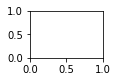

In [30]:
data.plot(kind='density', sharex=False)
ax=pyplot.subplot(4,4,4)
pyplot.show()
